In [28]:
!jt -t chesterish

# Iris Dataset Visualization, Feature importance, Prediction Using Premade Models and New Models

In [1]:
%matplotlib inline
%matplotlib notebook

## Imports

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn import preprocessing

## visualization

In [7]:
df_v = sns.load_dataset('iris')
df_v.info()
df_v.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
df_v['species'] = df_v['species'].astype('category')
df_v['target'] = pd.Categorical(df_v['species']).codes
df_v['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

<IPython.core.display.Javascript object>


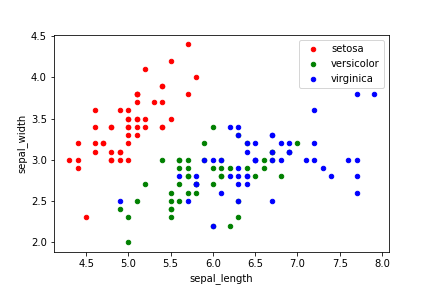

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

In [9]:
ax = df_v[df_v.species=='setosa'].plot.scatter(x='sepal_length', y='sepal_width',
                                               color='red',label='setosa')
df_v[df_v.species=='versicolor'].plot.scatter(x='sepal_length', y='sepal_width',
                                               color='green',label='versicolor', ax=ax)
df_v[df_v.species=='virginica'].plot.scatter(x='sepal_length', y='sepal_width',
                                               color='blue',label='virginica', ax=ax)

<IPython.core.display.Javascript object>


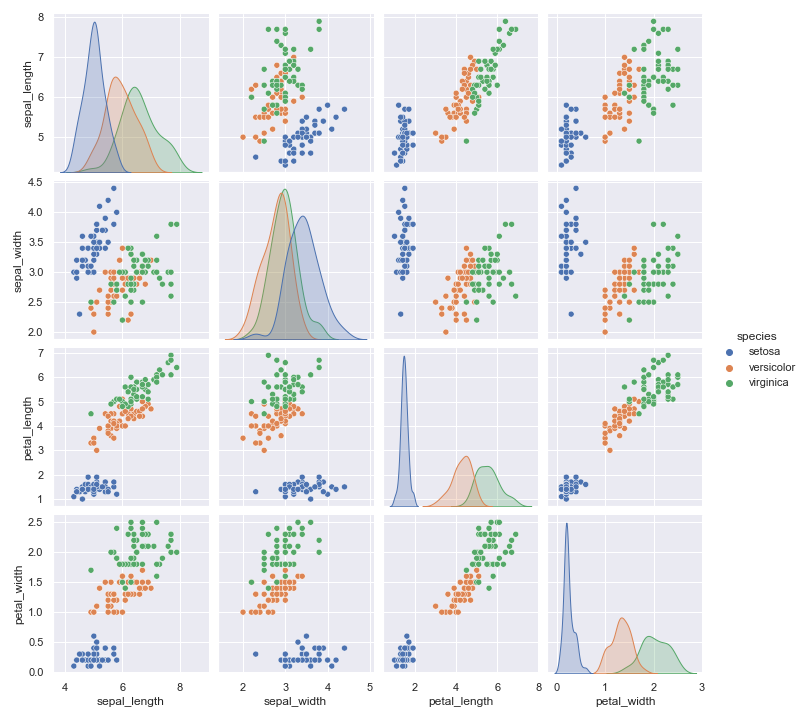

In [10]:
sns.set()
sns.pairplot(df_v[['sepal_length','sepal_width','petal_length','petal_width','species']],
            hue='species', diag_kind='kde')

<IPython.core.display.Javascript object>


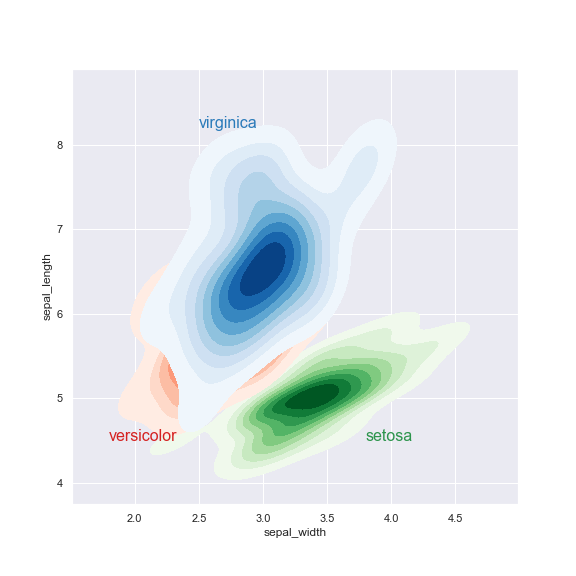

C:\Users\Warren Novascone\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Warren Novascone\anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Warren Novascone\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Warren Novascone\anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarn

Text(3.8, 4.5, 'setosa')

In [17]:
sns.set(style='darkgrid')
setosa = df_v.query("species=='setosa'")
versicolor = df_v.query("species=='versicolor'")
virginica = df_v.query("species=='virginica'")
f, ax = plt.subplots(figsize=(8,8))

ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length, cmap="Greens",
                shade=True, shade_lowest=False)
ax = sns.kdeplot(versicolor.sepal_width, versicolor.sepal_length, cmap="Reds",
                shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length, cmap="Blues",
                shade=True, shade_lowest=False)

red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
green = sns.color_palette("Greens")[-2]
ax.text(2.5, 8.2, "virginica", size=16, color=blue)
ax.text(1.8, 4.5, "versicolor", size=16, color=red)
ax.text(3.8, 4.5, "setosa", size=16, color=green)

<IPython.core.display.Javascript object>


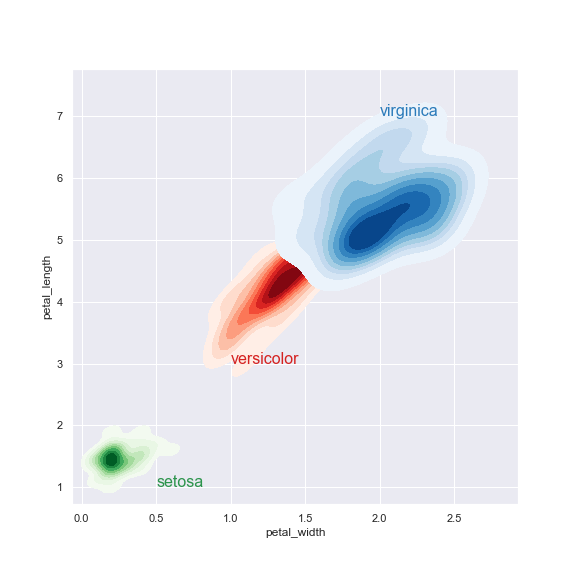

C:\Users\Warren Novascone\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Warren Novascone\anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Warren Novascone\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Warren Novascone\anaconda3\lib\site-packages\seaborn\distributions.py:1678: UserWarn

Text(0.5, 1, 'setosa')

In [27]:
sns.set(style='darkgrid')
setosa = df_v.query("species=='setosa'")
versicolor = df_v.query("species=='versicolor'")
virginica = df_v.query("species=='virginica'")
f, ax = plt.subplots(figsize=(8,8))

ax = sns.kdeplot(setosa.petal_width, setosa.petal_length, cmap="Greens",
                shade=True, shade_lowest=False)
ax = sns.kdeplot(versicolor.petal_width, versicolor.petal_length, cmap="Reds",
                shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.petal_width, virginica.petal_length, cmap="Blues",
                shade=True, shade_lowest=False)

red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
green = sns.color_palette("Greens")[-2]
ax.text(2, 7, "virginica", size=16, color=blue)
ax.text(1, 3, "versicolor", size=16, color=red)
ax.text(.5, 1, "setosa", size=16, color=green)

In [4]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
from sklearn.neighbors import KNeighborsClassifier

from IPython.display import display

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [10]:
var = "species"
cond = np.random.rand(len(df))>.2
train = np.where(cond)[0]
test = np.where(~cond)[0]

len(train), len(test)

(124, 26)

In [11]:
train_df = df.iloc[train]
test_df = df.iloc[test]
len(train_df), len(test_df)

(124, 26)

In [13]:
train_y = train_df['species']
train_x = train_df.drop(['species'], axis=1)

In [14]:
test_y = test_df['species']
test_x = test_df.drop(['species'], axis=1)

Train

In [18]:
model = KNeighborsClassifier()
model = model.fit(train_x,train_y)

<IPython.core.display.Javascript object>


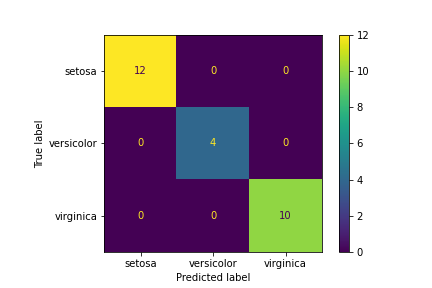

In [19]:
plot_confusion_matrix(estimator=model,X=test_x,y_true=test_y)

In [21]:
std_score = model.score(test_x,test_y)
std_score

1.0

## Importance of each feature

In [22]:
data = {'sepal_length':[0], 'sepal_width':[0], 'petal_length':[0], 'petal_width':[0]}
feat_imp = pd.DataFrame(data)
feat_imp.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0,0,0,0


### Permutate Sepal Length

In [23]:
test_x.head()

,sepal_length,sepal_width,petal_length,petal_width
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
7,5.0,3.4,1.5,0.2
9,4.9,3.1,1.5,0.1
13,4.3,3.0,1.1,0.1


In [25]:
test_SPL = test_x.copy()
test_SPL['sepal_length'] = np.random.permutation(test_SPL['sepal_length'])
test_SPL.head()

,sepal_length,sepal_width,petal_length,petal_width
4,5.1,3.6,1.4,0.2
5,6.7,3.9,1.7,0.4
7,5.3,3.4,1.5,0.2
9,5.4,3.1,1.5,0.1
13,5.8,3.0,1.1,0.1


In [26]:
model.score(test_SPL,test_y)

0.9615384615384616

In [29]:
feat_imp['sepal_length'] = std_score - model.score(test_SPL,test_y)
feat_imp.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.038462,0,0,0


In [30]:
test_SPW = test_x.copy()
test_SPW['sepal_width'] = np.random.permutation(test_SPW['sepal_width'])
test_SPW.head()

,sepal_length,sepal_width,petal_length,petal_width
4,5.0,2.7,1.4,0.2
5,5.4,2.8,1.7,0.4
7,5.0,3.0,1.5,0.2
9,4.9,2.9,1.5,0.1
13,4.3,3.8,1.1,0.1


In [31]:
model.score(test_SPW,test_y)

1.0

In [32]:
feat_imp['sepal_width'] = std_score - model.score(test_SPW,test_y)
feat_imp.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.038462,0.0,0,0


In [33]:
test_PL = test_x.copy()
test_PL['petal_length'] = np.random.permutation(test_PL['petal_length'])
test_PL.head()

,sepal_length,sepal_width,petal_length,petal_width
4,5.0,3.6,5.5,0.2
5,5.4,3.9,5.6,0.4
7,5.0,3.4,1.1,0.2
9,4.9,3.1,6.4,0.1
13,4.3,3.0,3.9,0.1


In [34]:
model.score(test_PL,test_y)

0.46153846153846156

In [35]:
feat_imp['petal_length'] = std_score - model.score(test_PL,test_y)
feat_imp.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.038462,0.0,0.538462,0


In [36]:
test_PW = test_x.copy()
test_PW['petal_width'] = np.random.permutation(test_PW['petal_width'])
test_PW.head()

,sepal_length,sepal_width,petal_length,petal_width
4,5.0,3.6,1.4,2.4
5,5.4,3.9,1.7,0.2
7,5.0,3.4,1.5,1.7
9,4.9,3.1,1.5,1.1
13,4.3,3.0,1.1,2.5


In [37]:
model.score(test_PW,test_y)

1.0

In [38]:
feat_imp['petal_width'] = std_score - model.score(test_PW,test_y)
feat_imp.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.038462,0.0,0.538462,0.0


#### Two most important features are sepal_length and petal_length